In [204]:
import geopandas as gpd
import numpy as np
import pandas as pd
import json
import os
import folium
import seaborn as sns

import sys 
sys.path.insert(0, "../src")
from BrusselsMap import BrusselsMap
from GeoJsonHandler import GeoJsonHandler
from OSMGeoJsonHandler import OSMGeoJsonHandler

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 500)

In [184]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [185]:
#Load geodata
r_path = r"../data/final_data/sector.json"
path = os.path.join(os.getcwd(), r_path)
sectors = GeoJsonHandler(path, "NAME_FRE")

r_path = r"../data/maps/municipalities/municipalities.json"
path = os.path.join(os.getcwd(), r_path)
muni = GeoJsonHandler(path, "name_fr")

In [186]:
mymap = BrusselsMap(muni, tiles=False)
mymap.build_sectors()
mymap.map

## Associate each neighborhood to a municipality

In [190]:
data = sectors.gdf[['ID', 'NAME_FRE', 'CENTER_LONG', 'CENTER_LAT']]
data.rename(columns={'CENTER_LONG':'Long', 'CENTER_LAT':'Lat'}, inplace=True)
assign = muni.assign_data_to_neighborhood(data, '../save.csv', muni=True)

C:\Users\vic_t\Anaconda3\envs\mfe_env\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 145/145 [00:02<00:00, 54.15it/s]


 Successfully saved CSV file. 



In [194]:
assign

,name_fr,ID,NAME_FRE,Long,Lat
0,Evere,83.0,CONSCIENCE,4.401070,50.871295
1,Schaerbeek,80.0,HELMET,4.387886,50.874418
2,Bruxelles,19.0,VIEUX LAEKEN OUEST,4.342702,50.876682
3,Bruxelles,20.0,VIEUX LAEKEN EST,4.352387,50.875449
4,Bruxelles,800.0,INDUSTRIE NORD,4.396198,50.894203
...,...,...,...,...,...
140,Woluwe-Saint-Pierre,97.0,PUTDAAL,4.440003,50.822435
141,Woluwe-Saint-Lambert,92.0,KAPELLEVELD,4.450578,50.847549
142,Woluwe-Saint-Pierre,96.0,SAINT-PAUL,4.450174,50.830043
143,Woluwe-Saint-Pierre,94.0,STOCKEL,4.456928,50.838922


## Now let's load residential data

In [234]:
r_path = r"../data/osm/overpass-turbo/residential.geojson"
path = os.path.join(os.getcwd(), r_path)

resi = OSMGeoJsonHandler(r_path, feature_type='tourism')

In [235]:
resi.gdf['Long'] = resi.gdf["geometry"].centroid.x
resi.gdf['Lat'] = resi.gdf["geometry"].centroid.y
resi.gdf.drop(columns='NAME', inplace=True)

In [238]:
resi.gdf.head()

,ID,TYPE,geometry,AREA,LAT,LON,Long,Lat
0,27780960,way,"POLYGON ((4.41392 50.81363, 4.41410 50.81360, ...",0.000307,50.813722,4.414047,4.414047,50.813722
1,27780970,way,"POLYGON ((4.41274 50.81366, 4.41291 50.81364, ...",0.000306,50.813758,4.412863,4.412863,50.813758
2,30088549,way,"POLYGON ((4.30973 50.87506, 4.31007 50.87495, ...",0.000959,50.875037,4.310159,4.310159,50.875037
3,30088551,way,"POLYGON ((4.30864 50.87556, 4.30881 50.87534, ...",0.000959,50.875380,4.308964,4.308964,50.875380
4,30088552,way,"POLYGON ((4.31239 50.87545, 4.31239 50.87536, ...",0.000314,50.875335,4.312467,4.312467,50.875335


In [237]:
data = resi.gdf[['ID','AREA','Long', 'Lat']]

In [240]:
results = muni.assign_data_to_neighborhood(data, 'saves.csv', muni=True)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6627/6627 [02:00<00:00, 55.11it/s]


 Successfully saved CSV file. 



In [ ]:
t

<AxesSubplot:xlabel='AREA', ylabel='Count'>

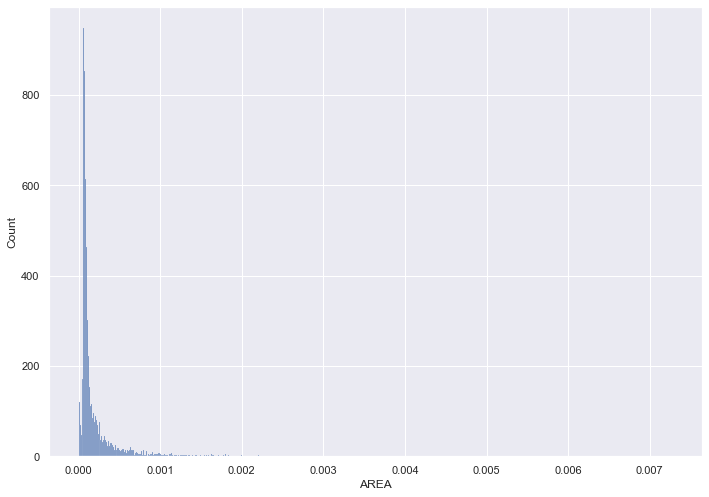

In [208]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(resi.gdf["AREA"])

In [212]:
print("The mean   area of a house is ", resi.gdf["AREA"].mean()*1e6)
print("The median area of a house is ", resi.gdf["AREA"].median()*1e6)

The mean   area of a house is  188.86005588417535
The median area of a house is  90.49343115598812
